In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import sys
import os
import mdtraj as md

# Add the project root
sys.path.append(os.path.abspath('../../'))

from src.useful_functions import *
from src.openmm.initial_trajectory_module import generate_initial_trajectory

# For reproducibility
np.random.seed(0)

# For matplotlib
font = {'size'   : 10}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches

# Read directory paths
read_dirs_paths('dir_paths.txt', globals())
check_directories(out_trajectories1 ,out_trajectories2 ,out_trajectories3 ,out_trajectories4)

Created variables:
inp_dir = input/
out_trajectories1 = output/trajectories/
out_trajectories2 = output/trajectories/openmm_files/
out_trajectories3 = output/trajectories/openmm_files/initial_states/
out_trajectories4 = output/trajectories/openmm_files/final_states/
out_trajectories5 = output/trajectories/openmm_files/final_states_nh/
out_isokann = output/isokann/
out_mokito = output/mokito/
output/trajectories/ already exists!
output/trajectories/openmm_files/ already exists!
output/trajectories/openmm_files/initial_states/ already exists!
output/trajectories/openmm_files/final_states/ already exists!
 
 


# Initial trajectory

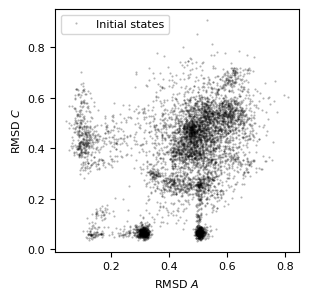

In [2]:
reference  = '1yrf.pdb'
ref     = md.load(inp_dir + reference, top = inp_dir + reference).remove_solvent()

pdbfile_solute = 'pdbfile_solute.pdb'
pdbfile_water  = 'pdbfile_water.pdb'

file_traj_water  = "trajectory_water.dcd"
file_traj_solute = "trajectory_solute.dcd"

mdtraj     = md.load(out_trajectories2  + file_traj_solute, top = inp_dir + pdbfile_solute)   

# RMSD A
a_ref  = ref.topology.select("resid 4 to 8 and backbone")
a_traj = mdtraj.topology.select("resid 4 to 8 and backbone")

# RMSD B
b_ref  = ref.topology.select("resid 15 to 18 and backbone")
b_traj = mdtraj.topology.select("resid 15 to 18 and backbone")

# RMSD C
c_ref  = ref.topology.select("resid 23 to 32 and backbone")
c_traj = mdtraj.topology.select("resid 23 to 32 and backbone")

# Segment A
sa_ref  = ref.topology.select("resid 3 to 21 and backbone")
sa_traj = mdtraj.topology.select("resid 3 to 21 and backbone")

# Segment B
sb_ref  = ref.topology.select("resid 15 to 33 and backbone")
sb_traj = mdtraj.topology.select("resid 15 to 33 and backbone")

da        = md.rmsd(mdtraj.atom_slice(a_traj), ref.atom_slice(a_ref))[0:]     
db        = md.rmsd(mdtraj.atom_slice(b_traj), ref.atom_slice(b_ref))[0:]    
dc        = md.rmsd(mdtraj.atom_slice(c_traj), ref.atom_slice(c_ref))[0:]   

sa        = md.rmsd(mdtraj.atom_slice(sa_traj), ref.atom_slice(sa_ref))[0:]     
sb        = md.rmsd(mdtraj.atom_slice(sb_traj), ref.atom_slice(sb_ref))[0:]   



font = {'size'   : 8}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches


fig, ax = plt.subplots(1,1,figsize=(8*in2cm, 8*in2cm))

ax.plot(sa, sb, 'k.', markersize= 1, alpha=0.3,  label='Initial states')


ax.set_xlabel(r'RMSD $A$')
ax.set_ylabel(r'RMSD $C$')
ax.legend()

fig.savefig("output/figures/initial_states.png", format='png', dpi=300, bbox_inches='tight')



np.savetxt(out_trajectories1 + 'Ra.txt', da)
np.savetxt(out_trajectories1 + 'Rb.txt', db)
np.savetxt(out_trajectories1 + 'Rc.txt', dc)
np.savetxt(out_trajectories1 + 'Sa.txt', sa)
np.savetxt(out_trajectories1 + 'Sb.txt', sb)

# Short trajectories

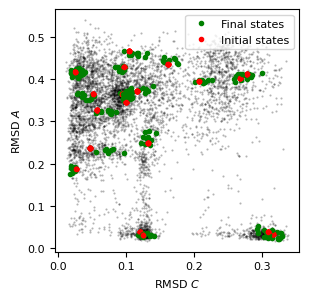

In [4]:
font = {'size'   : 8}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches


fig, ax = plt.subplots(1,1,figsize=(8*in2cm, 8*in2cm))

M          = 10

ax.plot(da, dc, 'k.', markersize= 1, alpha=0.3)

for i in np.arange(0,6000,300):
    for r in range(M):
        file_traj_solute = 'final_states/xt_' + str(i) + '_r' + str(r) + '.dcd'
        traj_rep      = md.load(out_trajectories2 + file_traj_solute, top = inp_dir + pdbfile_solute)   
        Nframes   = mdtraj.n_frames 

        da_rep        = md.rmsd(traj_rep.atom_slice(a_traj), ref.atom_slice(a_ref))[0:]     
        db_rep        = md.rmsd(traj_rep.atom_slice(b_traj), ref.atom_slice(b_ref))[0:]    
        dc_rep        = md.rmsd(traj_rep.atom_slice(c_traj), ref.atom_slice(c_ref))[0:]  

        ax.plot(da_rep[9], dc_rep[9], 'g.')
        ax.plot(da[i], dc[i], 'r.')



ax.plot(da_rep[9], dc_rep[9], 'g.',  label='Final states')
ax.plot(da[i], dc[i], 'r.',  label='Initial states')

ax.set_xlabel(r'RMSD $C$')
ax.set_ylabel(r'RMSD $A$')
ax.legend()

fig.savefig("output/figures/short_trajs.png", format='png', dpi=300, bbox_inches='tight')

